In [1]:
import sys

import pandas as pd
import numpy as np
import networkx as nx
import plfit
from numpy.random import rand,seed

# from matplotlib import use
# use("TkAgg") 
# import matplotlib
# import matplotlib.pyplot

import os
from IPython.display import Image

import plfit
from numpy.random import rand,seed

# %matplotlib agg
%matplotlib notebook

os.getcwd() 
if os.getcwd() + '/plpva_example'not in sys.path:
    sys.path.append(os.getcwd() + '/plpva_example')
    
%load_ext autoreload

%autoreload 1

%aimport plpva_example.example
%aimport plpva_example.plplot

plpva_example\plplot.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "C:\Anaconda3\envs\py27\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Anaconda3\envs\py27\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\envs\py27\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Anaconda3\envs\py27\lib\site-packages\tornado\ioloop.py", line 1073, in start
    

In [5]:
from numpy import *
from itertools import combinations
from numpy.random import choice
from scipy.sparse import dok_matrix
import powerlaw

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot_mpl
init_notebook_mode(connected=True)

def get_binning(data, num_bins = 15, is_pmf = True, log_binning = False, threshold = 0, low=None, up=None):
    
    # Let's filter out the isolated nodes
    values = list(filter(lambda x:x>threshold, data))
    if len(values)!=len(data):
        print("%s isolated nodes have been removed" % (len(data)-len(values)))
    
    # We need to define the support of our distribution
    if not low:
        lower_bound = min(values)
        upper_bound = max(values)
    else:
        lower_bound = low
        upper_bound = up

    if log_binning:
        lower_bound = log10(lower_bound)
        upper_bound = log10(upper_bound)
        
        # Log binning
        bin_edges = logspace(lower_bound, upper_bound, num_bins+1, base = 10)
        
    else:

        # Linear Binning
        bin_edges = linspace(lower_bound, upper_bound, num_bins+1)
    
    if is_pmf:
        y, __ = histogram(values,bins = bin_edges, density = False)
        p = (y+0.00000000001)/y.sum()
        #print p
    else:
        p, __ = histogram(values, bins = bin_edges, density = True)
        
        #print(p.sum())
        #print((p*np.diff(bin_edges)).sum())
    
    # Now, we need to compute for each y the value of x
    x = bin_edges[1:] - diff(bin_edges)/2 # centering x at the midpoint of the bin
    
    x = x[p>0]
    p = p[p>0]
    
    return x,p

In [8]:
path_dataset_dir = "../German/"
# cent_15 = pd.read_excel( path_dataset_dir + "/02 Frühneuhochdeutsch early new high/15cent.xlsx")
cent_15 = pd.read_excel( path_dataset_dir + "/02 Fruhneuhochdeutsch early new high/17.cent.xlsx")

G=nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
# nx.draw(G, with_labels=True)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

Calculating best minimal value for power law fit
C:\Anaconda3\envs\py27\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in divide



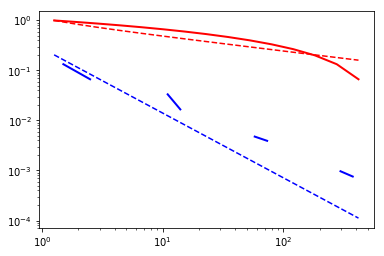

In [9]:
x, p = get_binning(degree_sequence, num_bins = 15, is_pmf = True, log_binning = True, threshold = 0, low=None, up=None)
# get_binning(data=degree_sequence, num_bins = 15, is_pmf = False, log_binning = True, threshold = 0, low=None, up=None)

fit = powerlaw.Fit(x, discrete=True, estimate_discrete=True)
            # Calculating best minimal value for power law fit> 
fit.power_law.alpha
fit.power_law.sigma

title = "{} - {}<br />PowerLaw ~ exponential: {}<br />PoweLaw ~ lognormal: {}".format(
    "02 Frühneuhochdeutsch early new high", "17.cent",
    fit.distribution_compare('power_law', 'exponential'),
    fit.distribution_compare('power_law', 'lognormal')
)

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=p
))

fig.update_layout(xaxis_type="log", yaxis_type="log", title=title)

# fig.write_image("temp/L_{}_{}.png".format(family, net))

- Fitting power law to empirical data: n
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power law:
  * Scaling parameter: alpha 2.35562
  * Lower bound: xmin 2
  Numerical maximization of the logarithm of the likelihood function L:
  * Scaling parameter: alpha 2.47874
  * Lower bound: xmin 2
  * Logarithm of the likelihood function: L 5897.26
  Generation of 100 power-law distributed synthetic data sets:
  * Fraction of data sets with worse KS statistic than the empirical data: p-value 0
  * KS statistic of the empirical data: D 0.0458026


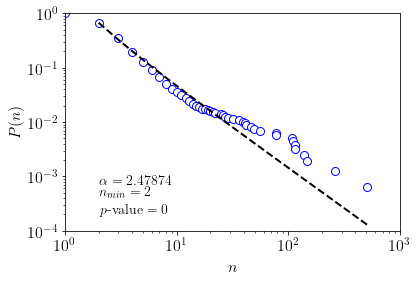

In [10]:
# plpva.example
# x = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4], dtype=float)  # sample data
x = np.array(degree_sequence, dtype=float)  # sample data
variable = "n"
subject = "example"
radius = 0.5
number_of_sets = 100
plpva_example.example.power_law(x, variable, subject, radius, number_of_sets)
del x
# Image(filename ='plplot_example.png')

In [6]:
# generate a power law using the "inverse" power-law generator code
# X=plfit.plexp_inv(rand(1000),1,2.5)
X = np.array(degree_sequence)

# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit=plfit.plfit(X,usefortran=False)

# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695

# generate some plots
from pylab import *
figure(1)
myplfit.plotpdf()

figure(2)
myplfit.plotcdf()

# POWERLAW PACKAGE

In [11]:
cent_15.columns

Index(['Source', 'Target', 'Interaction'], dtype='object')

In [7]:
families = {
    "01 Mittelhochdeutsch middle high":["11.century.xlsx", "12. century.xlsx", "13century .xlsx", "E14.xlsx"], 
    "02 Frühneuhochdeutsch early new high": ["15cent.xlsx", "16.cent.xlsx", "17.cent.xlsx", "L14.Century.xlsx"], 
           }

%matplotlib notebook

for family, nets in families.items():
    for net in nets:
        print('------------------------------------------------------')
        print(f'---------------------------{net}-----------------')
        print('------------------------------------------------------')
        cent_15 = pd.read_excel(path_dataset_dir + family + "/" + net).rename(columns={
            'Source ': 'Source'
        })

        G=nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
        # nx.draw(G, with_labels=True)
#         degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
        degree_sequence = np.array([d for n, d in G.degree()])
        
        
        fit = powerlaw.Fit(degree_sequence, discrete=True, estimate_discrete=True)
    
        print("fit.power_law.alpha: ", fit.power_law.alpha, "fit.power_law.sigma: ", fit.power_law.sigma,
             "fit.xmin: ", fit.xmin, "fit.power_law.parameter1_name: ", fit.power_law.parameter1_name)

        print("R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.")
        R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
        print ("R: ", R, "p: ", p)
#         print("Also test with: ", fit.supported_distributions)

        for dist_name in fit.supported_distributions.keys():
            if dist_name == 'power_law':
                continue

            R, p = fit.distribution_compare('power_law', dist_name, normalized_ratio=True)
            print ("test ('power_law', '", dist_name, "'): ", "R: ", R, "p: ", p)
    
    
        variable = "GERMAN"
        subject = family
        radius = 0.2 #0.5
        number_of_sets = 100
        plpva_example.example.power_law(degree_sequence, variable, subject, radius, number_of_sets)
    
        if False:
    
            fit = powerlaw.Fit(X, discrete=True, estimate_discrete=True)
            # Calculating best minimal value for power law fit> 
            fit.power_law.alpha
            fit.power_law.sigma

            title = "{} - {}<br />PowerLaw ~ exponential: {}<br />PoweLaw ~ lognormal: {}".format(
                family, net,
                fit.distribution_compare('power_law', 'exponential'),
                fit.distribution_compare('power_law', 'lognormal')
            )

            fig2 = fit.plot_pdf(color='b', linewidth=2)
            fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
            fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
            fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
            # ---------------------------------------------
            # G=  nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
            # G = G.to_directed()
            # nx.draw(G, with_labels=True)
            # degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)

            x, p = get_binning(data=degree_sequence, num_bins = 15, 
                               is_pmf = False, log_binning = True, threshold = 0, low=None, up=None)

            if False:
                degreeCount = collections.Counter(X)
                deg, cnt = zip(*degreeCount.items())

            fig = go.Figure()

            fig.add_trace(go.Scatter(
                x=x,
                y=p
            ))

            fig.update_layout(xaxis_type="log", yaxis_type="log", title=title)

            fig.write_image("temp/L_{}_{}.png".format(family, net))

    #         pio.show(fig, renderer='browser', validate=True)

            # fig.show()

            # fig, ax = plt.subplots()
            # plt.bar(np.log(deg), np.log(cnt), width=0.80, color='b')
            pass
        pass

------------------------------------------------------
---------------------------11.century.xlsx-----------------
------------------------------------------------------
fit.power_law.alpha:  2.418687224783902 fit.power_law.sigma:  0.0869852947939761 fit.xmin:  2.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
R:  2.730464839934862 p:  0.0063245079031006134


Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

divide by zero encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


test ('power_law', ' lognormal '):  R:  -1.306519769050626 p:  0.1913758606794187
test ('power_law', ' exponential '):  R:  2.730464839934862 p:  0.0063245079031006134
test ('power_law', ' truncated_power_law '):  R:  -0.7063365952899747 p:  0.1403283449114736
test ('power_law', ' stretched_exponential '):  R:  0.5497626515563109 p:  0.5824821785818728
test ('power_law', ' lognormal_positive '):  R:  2.138098375650986 p:  0.03250875975137625
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power law:
  * Scaling parameter: alpha 2.41869
  * Lower bound: xmin 2
  Numerical maximization of the logarithm of the likelihood function L:
  * Scaling parameter: alpha 2.19827
  * Lower bound: xmin 6
  * Logarithm of the likelihood function: L 1532.3
  Generation of 100 power-law distributed synthetic data sets:
  * Fraction of data sets with worse KS statistic than the empirical data: p-value 0.91
  * KS statistic of the 

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

divide by zero encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


test ('power_law', ' truncated_power_law '):  R:  -0.7092458457906148 p:  0.1386496484387606
test ('power_law', ' stretched_exponential '):  R:  0.4774632685552981 p:  0.6330322708013012
test ('power_law', ' lognormal_positive '):  R:  2.495463304764263 p:  0.01257927653675177
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power law:
  * Scaling parameter: alpha 2.37943
  * Lower bound: xmin 2
  Numerical maximization of the logarithm of the likelihood function L:
  * Scaling parameter: alpha 1.98362
  * Lower bound: xmin 8
  * Logarithm of the likelihood function: L 1403.28
  Generation of 100 power-law distributed synthetic data sets:
  * Fraction of data sets with worse KS statistic than the empirical data: p-value 0.95
  * KS statistic of the empirical data: D 0.0822192
------------------------------------------------------
---------------------------13century .xlsx-----------------
------------------------

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

divide by zero encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


fit.power_law.alpha:  2.3614281686660474 fit.power_law.sigma:  0.09650908407362796 fit.xmin:  3.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
R:  3.3545037840285534 p:  0.0007950746571563864
test ('power_law', ' lognormal '):  R:  -1.061778864899218 p:  0.2883360867686897
test ('power_law', ' exponential '):  R:  3.3545037840285534 p:  0.0007950746571563864
test ('power_law', ' truncated_power_law '):  R:  -0.21002329403706707 p:  0.649396353474021
test ('power_law', ' stretched_exponential '):  R:  1.5512256632144716 p:  0.12084761410519226
test ('power_law', ' lognormal_positive '):  R:  2.5258975879764627 p:  0.011540311699613748
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power la

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

divide by zero encountered in true_divide

Assuming nested distributions


test ('power_law', ' lognormal '):  R:  -1.0177463513922218 p:  0.3087985134326705
test ('power_law', ' exponential '):  R:  3.4554261047572683 p:  0.0005494237724730426
test ('power_law', ' truncated_power_law '):  R:  -0.08590324866051659 p:  0.8501244917084616
test ('power_law', ' stretched_exponential '):  R:  1.5378929298123287 p:  0.12407479629630391
test ('power_law', ' lognormal_positive '):  R:  2.049474588717745 p:  0.04041573018528226
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power law:
  * Scaling parameter: alpha 2.35984
  * Lower bound: xmin 4
  Numerical maximization of the logarithm of the likelihood function L:
  * Scaling parameter: alpha 2.1993
  * Lower bound: xmin 4
  * Logarithm of the likelihood function: L 2873.42
  Generation of 100 power-law distributed synthetic data sets:
  * Fraction of data sets with worse KS statistic than the empirical data: p-value 0.17
  * KS statistic of 

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


fit.power_law.alpha:  2.2845060300178774 fit.power_law.sigma:  0.111380798454235 fit.xmin:  4.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
R:  3.223445196190999 p:  0.0012665853238127758
test ('power_law', ' lognormal '):  R:  -1.0171402958996238 p:  0.30908669327659044
test ('power_law', ' exponential '):  R:  3.223445196190999 p:  0.0012665853238127758
test ('power_law', ' truncated_power_law '):  R:  -0.09996533850961621 p:  0.8500765498657981
test ('power_law', ' stretched_exponential '):  R:  1.3527783863620695 p:  0.17612643962346353
test ('power_law', ' lognormal_positive '):  R:  2.0892031892705734 p:  0.03668943647378032
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power law:

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

divide by zero encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


fit.power_law.alpha:  2.3923240227647096 fit.power_law.sigma:  0.06777727296615846 fit.xmin:  3.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
R:  4.309784258683822 p:  1.6341388665531645e-05
test ('power_law', ' lognormal '):  R:  -1.1034789852243945 p:  0.26981921264784703
test ('power_law', ' exponential '):  R:  4.309784258683822 p:  1.6341388665531645e-05
test ('power_law', ' truncated_power_law '):  R:  -0.3185315986972044 p:  0.4912685817855519
test ('power_law', ' stretched_exponential '):  R:  2.257999903492808 p:  0.023945665451462025
test ('power_law', ' lognormal_positive '):  R:  3.4088943316516103 p:  0.0006522673974712608
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

divide by zero encountered in true_divide

Assuming nested distributions


fit.power_law.alpha:  2.3556178763355415 fit.power_law.sigma:  0.041598246950790924 fit.xmin:  2.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
R:  3.9533626285185166 p:  7.706051339408023e-05
test ('power_law', ' lognormal '):  R:  -0.6886408011672426 p:  0.49104933830558795
test ('power_law', ' exponential '):  R:  3.9533626285185166 p:  7.706051339408023e-05
test ('power_law', ' truncated_power_law '):  R:  -1.3921251198181224 p:  0.006508538720128798
test ('power_law', ' stretched_exponential '):  R:  0.42603708453487427 p:  0.6700808237006335
test ('power_law', ' lognormal_positive '):  R:  2.3594526084464404 p:  0.018301918382711085
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete pow

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

divide by zero encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


fit.power_law.alpha:  2.410529703823289 fit.power_law.sigma:  0.08326093581828957 fit.xmin:  3.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
R:  3.3429408648467227 p:  0.0008289556298241861
test ('power_law', ' lognormal '):  R:  -1.0782069853439897 p:  0.2809413952951012
test ('power_law', ' exponential '):  R:  3.3429408648467227 p:  0.0008289556298241861
test ('power_law', ' truncated_power_law '):  R:  -0.2720082902594924 p:  0.5615294751928611
test ('power_law', ' stretched_exponential '):  R:  1.5438941250849794 p:  0.12261398357432933
test ('power_law', ' lognormal_positive '):  R:  2.608282422138607 p:  0.009099784117995866
- Fitting power law to empirical data: GERMAN
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power law

In [85]:
degreeCount = collections.Counter(X)
deg, cnt = zip(*degreeCount.items())

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=p
))

fig.update_layout(xaxis_type="log", yaxis_type="log", title="{} - {}".format(family, net))
fig.show()

# fig, ax = plt.subplots()
# plt.bar(np.log(deg), np.log(cnt), width=0.80, color='b')

NameError: name 'family' is not defined

In [13]:
path_dataset_dir = "../German/"
cent_15 = pd.read_excel( path_dataset_dir + "/02 Frühneuhochdeutsch early new high/15cent.xlsx")

G=nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
# nx.draw(G, with_labels=True)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
data = degree_sequence
fit = powerlaw.Fit(data, discrete=True, estimate_discrete=True)

fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide



(73.34520449577172, 0.0012665853238127758)

In [14]:
fit.power_law.plot_pdf(color='b')

<AxesSubplot:>

In [38]:
print("fit.power_law.alpha: ", fit.power_law.alpha, "fit.power_law.sigma: ", fit.power_law.sigma,
     "fit.xmin: ", fit.xmin, "fit.power_law.parameter1_name: ", fit.power_law.parameter1_name)

print("""R is the loglikelihood ratio between the two candidate distributions. This number will be positive
if the data is more likely in the rst distribution, and negative if the data is more likely in the second
distribution.""")
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print ("R: ", R, "p: ", p)
print("Also test with: ", fit.supported_distributions)

fit.power_law.alpha:  2.5504404974544377 fit.power_law.sigma:  0.13444024124966789 fit.xmin:  4.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive
if the data is more likely in the rst distribution, and negative if the data is more likely in the second
distribution.
R:  3.841046580239975 p:  0.00012251086210349107
Also test with:  {'power_law': <class 'powerlaw.Power_Law'>, 'lognormal': <class 'powerlaw.Lognormal'>, 'exponential': <class 'powerlaw.Exponential'>, 'truncated_power_law': <class 'powerlaw.Truncated_Power_Law'>, 'stretched_exponential': <class 'powerlaw.Stretched_Exponential'>, 'lognormal_positive': <class 'powerlaw.Lognormal_Positive'>}


In [15]:
for dist_name in fit.supported_distributions.keys():
    if dist_name == 'power_law':
        continue
        
    R, p = fit.distribution_compare('power_law', dist_name, normalized_ratio=True)
    print ("test ('power_law', '", dist_name, "'): ", "R: ", R, "p: ", p)

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


test ('power_law', ' lognormal '):  R:  -1.0171402958996238 p:  0.30908669327659044
test ('power_law', ' exponential '):  R:  3.223445196190999 p:  0.0012665853238127758
test ('power_law', ' truncated_power_law '):  R:  -0.09996533850961621 p:  0.8500765498657981
test ('power_law', ' stretched_exponential '):  R:  1.3527783863620695 p:  0.17612643962346353
test ('power_law', ' lognormal_positive '):  R:  2.0892031892705734 p:  0.03668943647378032


In [57]:
[d for d in data if d == 1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


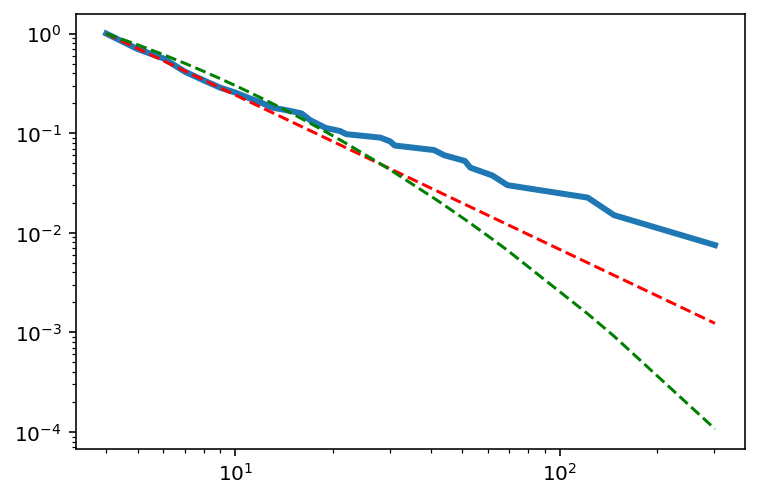

In [47]:
fig4 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--')
fit.lognormal_positive.plot_ccdf(ax=fig4, color='g', linestyle='--')

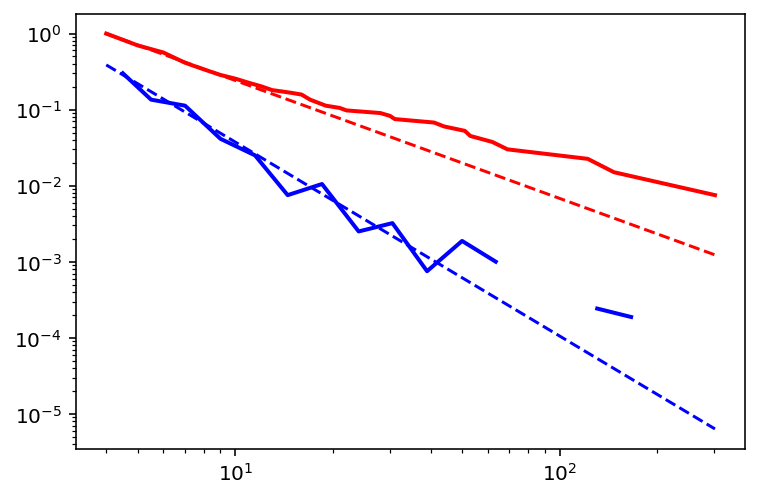

In [32]:
# powerlaw.plot_pdf(data, color='r', linear_bins=True)

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)